# Experimental setup

- Traning and inference with nnU-Net, standard parameters
- Training/test split 80/20
- Traing set: 5-fold CV, also just following standard nnU-Net pipeline, but custom slit for folds because
- Patients are not mixed in training, validation and test sets (so the sets are splitted by patient id)

In [2]:
from pathlib import Path
from skimage import io
import random
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
import cv2
%matplotlib inline

In [3]:
train_stat_path = Path("../../data/cinemri_mha/pre_nnUNet/results")
train_curves_file = "progress.png"
folds_folders = [f.name for f in train_stat_path.iterdir() if f.is_dir()]
folds_folders.sort()
print(folds_folders)

['fold1', 'fold2', 'fold3', 'fold4', 'fold5']


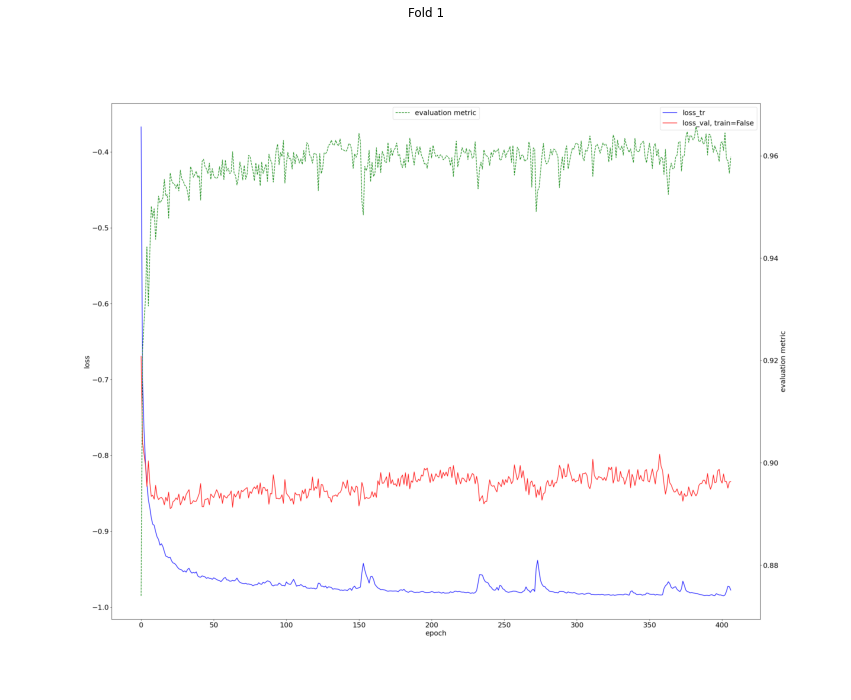

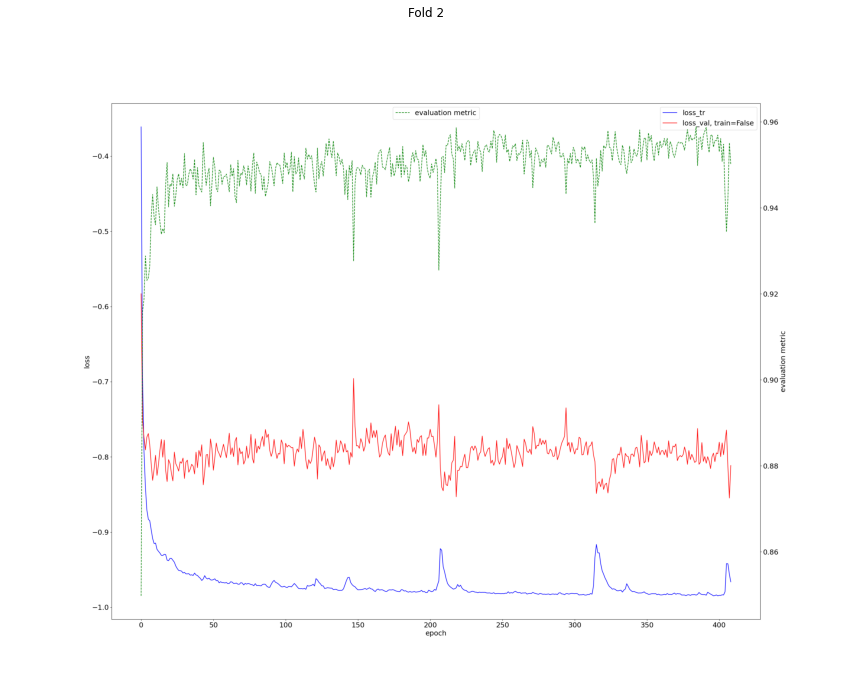

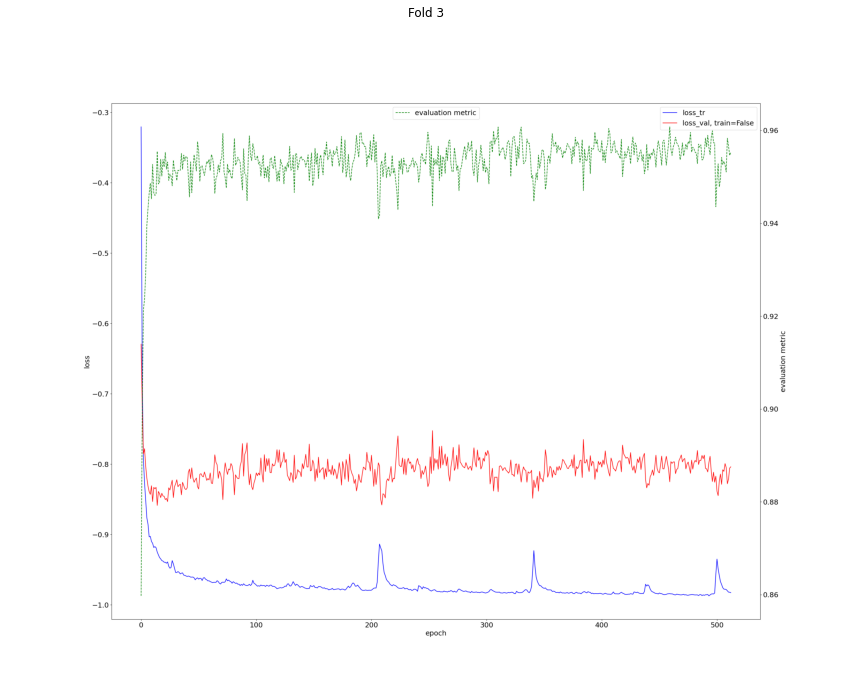

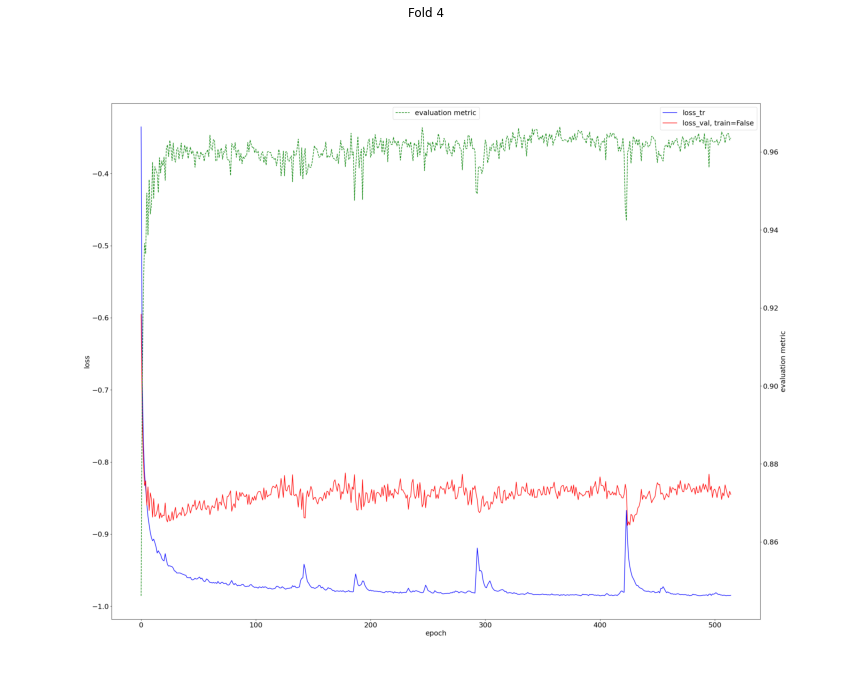

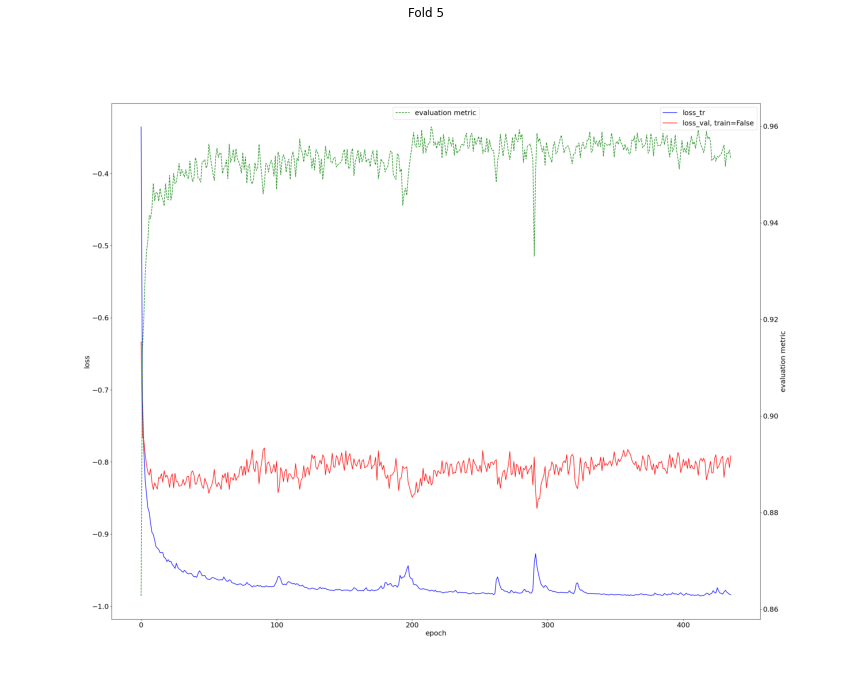

In [4]:
for ind, fold in enumerate(folds_folders):
    progress_path = train_stat_path / fold / train_curves_file
    progress_image = io.imread(progress_path)
    
    plt.figure(figsize=(15,20))
    plt.imshow(progress_image)
    plt.axis("off")
    plt.title("Fold {}".format(ind + 1))
    plt.show

In [5]:
test_cases_path = Path("../../data/cinemri_mha/pre_nnUNet/test_nnUNet/images")
gt_masks_path = Path("../../data/cinemri_mha/pre_nnUNet/test_nnUNet/masks")
nnUNet_masks_path = Path("../../data/cinemri_mha/pre_nnUNet/test_nnUNet/nnUNet_test_results_pp")
nnUNet_masks_out_path = Path("../../data/cinemri_mha/pre_nnUNet/test_nnUNet/nnUNet_test_results_png")
nnUNet_masks_out_path.mkdir(exist_ok=True)

In [6]:
# get scans ids
source_files = test_cases_path.glob("*.nii.gz")
source_file_names = [file.name for file in source_files]

In [7]:
def calculate_dice(x, y):
    return 2 * np.count_nonzero(x & y) / (np.count_nonzero(x) + np.count_nonzero(y))

def visualize_prediction(slice_file_name, test_cases_path, gt_masks_path, nnUNet_masks_path, nnUNet_masks_out_path = None):
    print("Slice id: {}".format(slice_file_name))
    image = sitk.GetArrayFromImage(sitk.ReadImage(str(test_cases_path / slice_file_name)))[0]
    gt_mask = sitk.GetArrayFromImage(sitk.ReadImage(str(gt_masks_path / (slice_file_name[:-12]+".nii.gz"))))[0]
    nnUNet_mask = sitk.GetArrayFromImage(sitk.ReadImage(str(nnUNet_masks_path / (slice_file_name[:-12] + ".nii.gz"))))[0]
    print("Dice: {}".format(calculate_dice(gt_mask, nnUNet_mask)))

    plt.figure(figsize=(16,12))

    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap="gray")
    plt.axis("off")
    plt.title("Slice")

    plt.subplot(1, 3, 2)
    plt.imshow(image, cmap="gray")
    masked = np.ma.masked_where(gt_mask == 0, gt_mask)
    plt.imshow(masked, cmap='autumn', alpha=0.2)
    plt.axis("off")
    plt.title("GT segmentation")

    plt.subplot(1, 3, 3)
    plt.imshow(image, cmap="gray")
    masked = np.ma.masked_where(nnUNet_mask == 0, nnUNet_mask)
    plt.imshow(masked, cmap='autumn', alpha=0.2)
    plt.axis("off")
    plt.title("nnU-Net segmentation")
    plt.show()
    
    if not (nnUNet_masks_out_path is None):
        overlayed_mask_file_path = nnUNet_masks_out_path / (slice_file_name[:-12] + ".png")
        plt.figure()
        plt.imshow(image, cmap="gray")
        masked = np.ma.masked_where(nnUNet_mask == 0, nnUNet_mask)
        plt.imshow(masked, cmap='autumn', alpha=0.2)
        plt.axis("off")
        plt.savefig(overlayed_mask_file_path)

Slice id: ANONP5AEPE1G8_1.2.752.24.7.621449243.4207770_1.3.12.2.1107.5.2.30.26380.2018090412165799200733533.0.0_0000.nii.gz
Dice: 0.8651966355989997


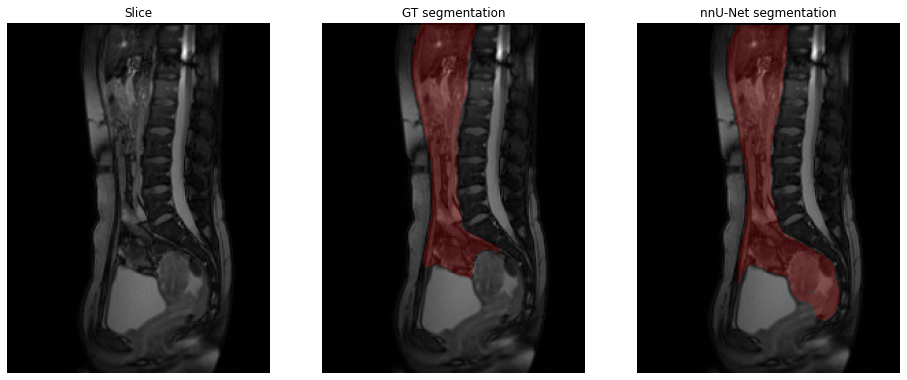

Slice id: ANONSL03RE121_1.2.752.24.7.621449243.4447124_1.3.12.2.1107.5.2.30.26380.2019042413482430117360465.0.0_0000.nii.gz
Dice: 0.9637664697864607


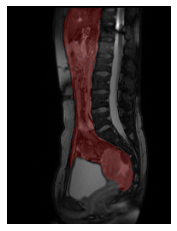

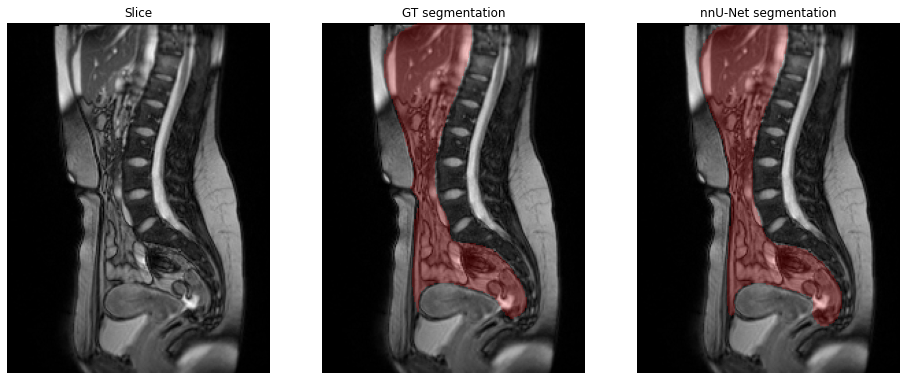

Slice id: ANONFDV2RE1BC_1.2.752.24.7.621449243.4464826_1.3.12.2.1107.5.2.30.26380.2019061211273142087528838.0.0_0000.nii.gz
Dice: 0.963195214895567


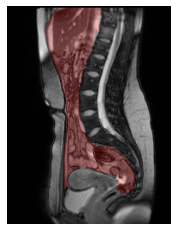

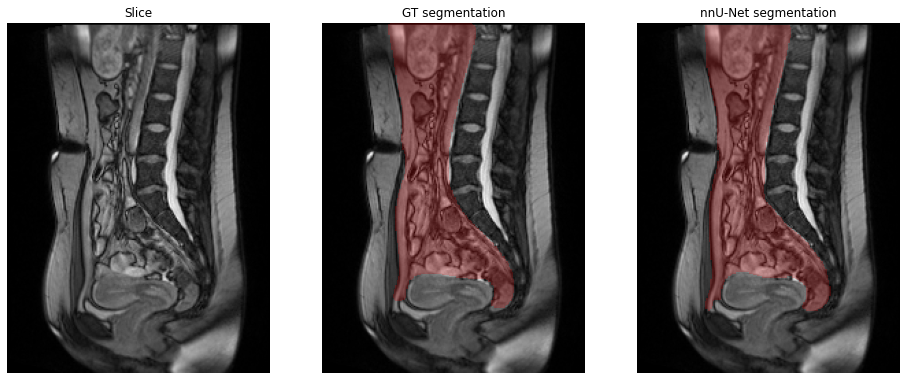

Slice id: ANON0603RE1RU_1.2.752.24.7.621449243.4464827_1.3.12.2.1107.5.2.30.26380.2019050613462795937452639.0.0_0000.nii.gz
Dice: 0.9281437125748503


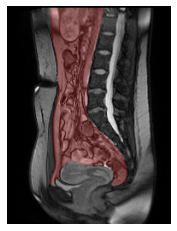

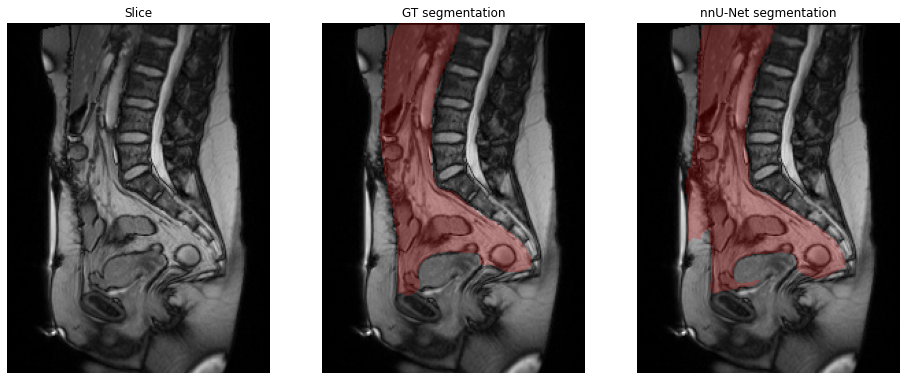

Slice id: ANON8AV2RE1FH_1.2.752.24.7.621449243.4516751_1.3.12.2.1107.5.2.30.26380.2019060315024497370867850.0.0_0000.nii.gz
Dice: 0.9732555928766081


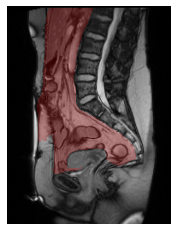

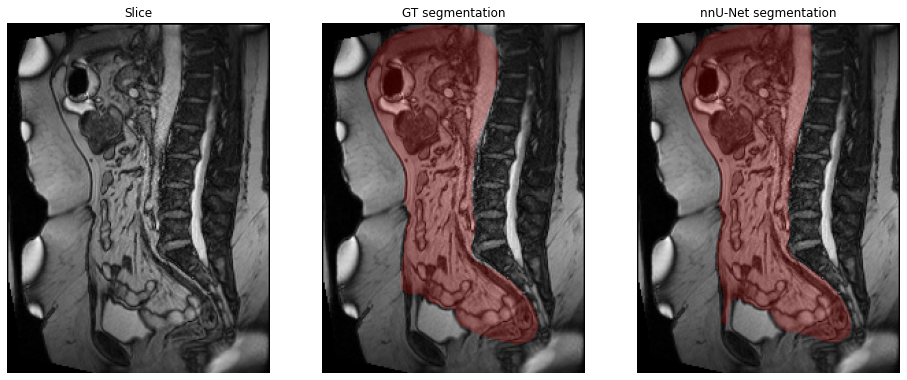

Slice id: ANONSR03RE19I_1.2.752.24.7.621449243.4468029_1.3.12.2.1107.5.2.30.26380.2019041712551238595044364.0.0_0000.nii.gz
Dice: 0.9758420031740433


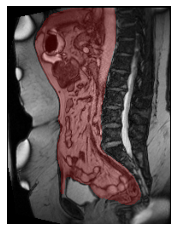

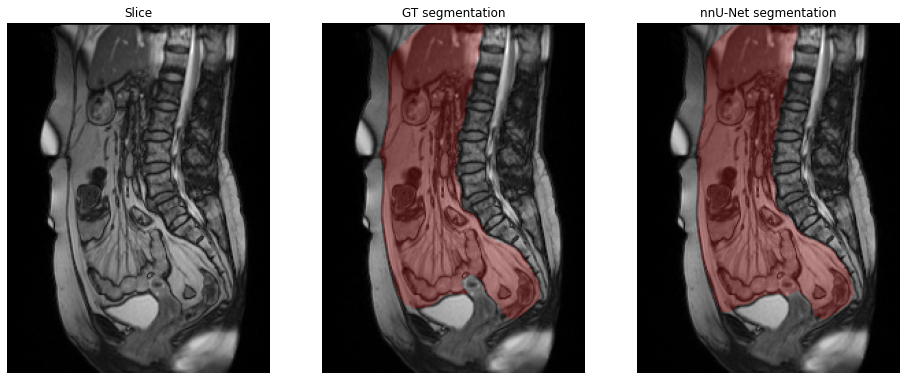

Slice id: ANON85TEPE13J_1.2.752.24.7.621449243.4258567_1.3.12.2.1107.5.2.30.26380.2018102912120095260737288.0.0_0000.nii.gz
Dice: 0.9673184160372698


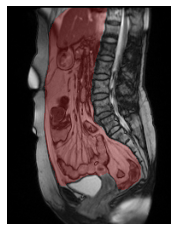

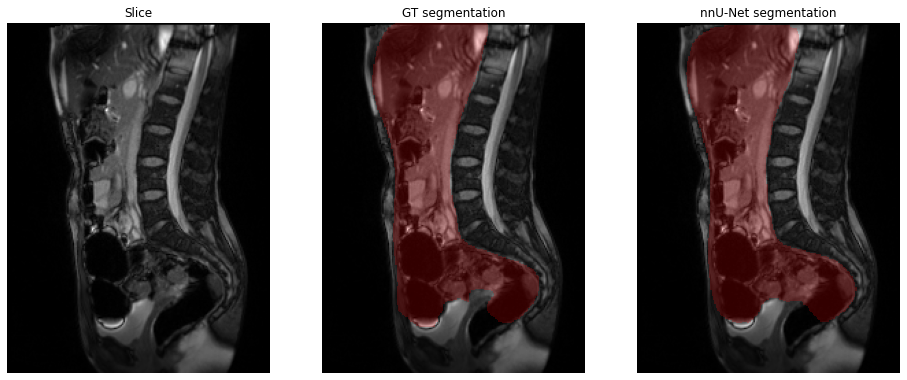

Slice id: ANON7T13RE1KK_1.2.752.24.7.621449243.4345197_1.3.12.2.1107.5.2.30.26380.2019011409493854295108631.0.0_0000.nii.gz


RuntimeError: Exception thrown in SimpleITK ImageFileReader_Execute: /Users/runner/work/1/sitk/Code/IO/src/sitkImageReaderBase.cxx:97:
sitk::ERROR: The file "../../data/cinemri_mha/pre_nnUNet/test_nnUNet/masks/ANON7T13RE1KK_1.2.752.24.7.621449243.4345197_1.3.12.2.1107.5.2.30.26380.2019011409493854295108631.0.0.nii.gz" does not exist.

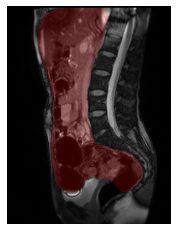

In [8]:
for file_name in source_file_names:
    visualize_prediction(file_name, test_cases_path, gt_masks_path, nnUNet_masks_path, nnUNet_masks_out_path)